This notebook uses code from this tutorial: https://qiskit.org/ecosystem/machine-learning/tutorials/02_neural_network_classifier_and_regressor.html

You need the latest version of Qiskit for this to work.

# Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit_algorithms.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.circuit.library import QNNCircuit

algorithm_globals.random_seed = 42

# Generating data

In [2]:
def circle(samples, center=[0.0, 0.0], radius=np.sqrt(2 / np.pi)):
    Xvals, yvals = [], []

    for i in range(samples):
        x = 2 * (np.random.rand(2)) - 1
        y = 0
        if np.linalg.norm(x - center) < radius:
            y = 1
        Xvals.append(x)
        yvals.append(y)

    return np.array(Xvals), np.array(yvals)


def plot_data(x, y, fig=None, ax=None):
    if fig == None:
        fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    reds = y == 0
    blues = y == 1

    ax.scatter(x[reds, 0], x[reds, 1], c="red", s=20, edgecolor="k")
    ax.scatter(x[blues, 0], x[blues, 1], c="blue", s=20, edgecolor="k")
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")


X_train, y_train = circle(500)
X_test, y_test = circle(500)

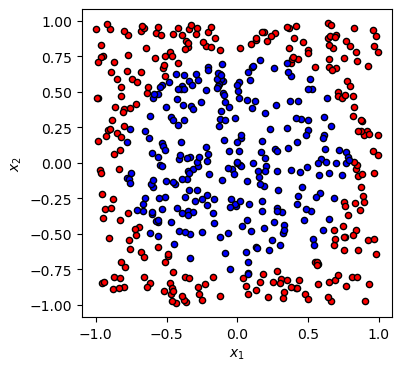

In [3]:
# train data
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_data(X_train, y_train, fig=fig, ax=ax)
plt.show()

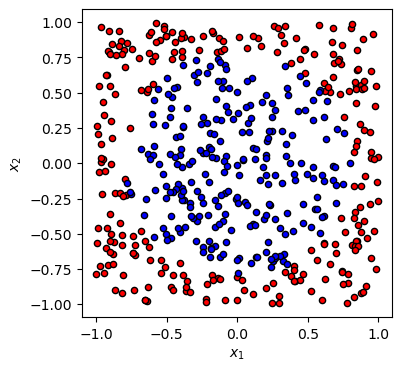

In [4]:
# test data
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_data(X_test, y_test, fig=fig, ax=ax)
plt.show()

# Create PQC

C:\Users\Dean\anaconda3\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


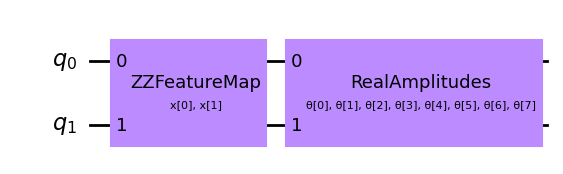

In [5]:
qc = QNNCircuit(num_qubits=2)
qc.draw(output="mpl")

In [6]:
estimator_qnn = EstimatorQNN(circuit=qc)

In [7]:
estimator_qnn.forward(X_train[0, :], algorithm_globals.random.random(estimator_qnn.num_weights))

array([[0.42025626]])

In [8]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [9]:
estimator_classifier = NeuralNetworkClassifier(
    estimator_qnn, optimizer=COBYLA(maxiter=60), callback=callback_graph
)

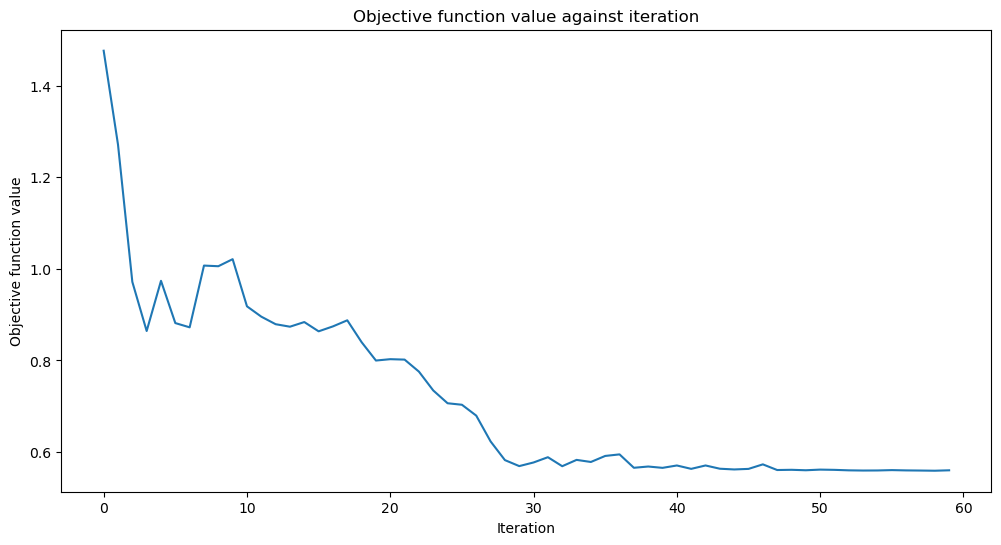

In [10]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
estimator_classifier.fit(X_train, 2*y_train - 1)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

In [11]:
def get_accuracy(x, y):
    y_predict = estimator_classifier.predict(x)
    y_predict = (y_predict + 1) // 2
    y_predict = y_predict.astype(int)
    y_predict = y_predict.flatten()

    accuracy = np.sum(y_predict == y) / len(y)
    
    return accuracy

In [12]:
train_accuracy = get_accuracy(X_train, y_train)
test_accuracy = get_accuracy(X_test, y_test)

print(f"Train accuracy {train_accuracy}")
print(f"Test accuracy {test_accuracy}")

Train accuracy 0.854
Test accuracy 0.866
